In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Polynomial linear regression 

y = p + p1*x1 + p2*x1(^2) + p3*x1(^3) + ...) + pn*x1(^n)

In [2]:
data = pd.read_excel("Lesson14-age-height.xlsx")
data

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [4]:
# x = data[["Age"]]
x=data.iloc[:,:-1]
x.shape

(71, 1)

In [5]:
y = data["Height"]
y.shape

(71,)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train

,Age
2,12
40,50
11,21
3,13
54,64
45,55
10,20
41,51
49,59
53,63


In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
y_predict1 = linreg.predict(x_test)
y_predict1

array([152.90005813, 153.8194466 , 173.1266044 , 149.22250426,
       156.577612  , 175.8847698 , 135.43167726, 183.23987754,
       160.25516587, 193.35315067, 180.48171214, 154.73883506,
       157.49700047, 167.6102736 , 159.3357774 , 179.56232367,
       192.43376221, 185.99804294, 168.52966207, 132.67351186,
       188.75620834, 174.96538134])

In [9]:
y_test

26    148
27    148
48    167
22    146
30    150
51    170
7     140
59    185
34    153
70    208
56    178
28    149
31    150
42    162
33    152
55    175
69    207
62    193
43    163
4     139
65    203
50    169
Name: Height, dtype: int64

In [10]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test,y_predict1)
score1

0.8727873738671587

In [11]:
# r2_score?

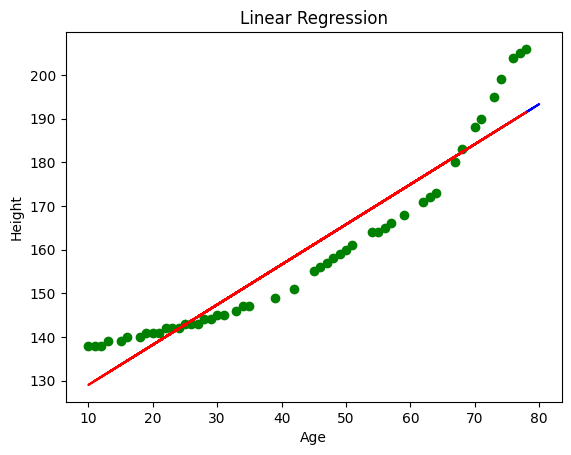

In [12]:
plt.scatter(x_train,y_train, color = "green")
plt.plot(x_test, y_predict1, color = "blue")
plt.plot(x_train, linreg.predict(x_train), color = "red")
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Linear Regression")
plt.show()

# add the polynomial term

In [13]:
from sklearn.preprocessing import PolynomialFeatures 

polynom = PolynomialFeatures(degree = 2) #degree could also start with 3,4 for testing
x_polynom = polynom.fit_transform(x_train)
x_polynom

array([[1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 5.100e+01, 2.601e+03],
       [1.000e+00, 5.900e+01, 3.481e+03],
       [1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 4.200e+01, 1.764e+03],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 6.200e+01, 3.844e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.600e+01, 6.760e+02],
       [1.000e+00, 3.000e+01, 9.00

In [14]:
x_polynom.shape

(49, 3)

In [15]:
PolyReg = LinearRegression()
PolyReg.fit(x_polynom,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Text(0.5, 1.0, 'Polynomial Regression')

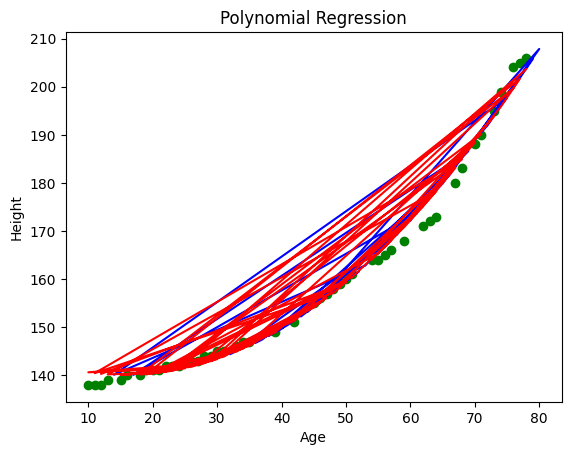

In [16]:
#visualize the Polynomial regression results

plt.scatter(x_train,y_train, color = "green")

plt.plot(x_test, PolyReg.predict(polynom.fit_transform(x_test)), color = "blue")
plt.plot(x_train, PolyReg.predict(polynom.fit_transform(x_train)), color = "red")
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Polynomial Regression")

## compare the predicted results vs test/real data (for simple linear regression slr) & polynomial regression pr

In [17]:


y_predict_slr = linreg.predict(x_test) 

from sklearn import metrics 
r_square_slr = metrics.r2_score(y_test, y_predict_slr)
r_square_slr

0.8727873738671587

In [18]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(x_test))

r_square_pr = metrics.r2_score(y_test,y_predict_pr)
r_square_pr

0.9892511710983519

In [19]:
linreg.predict([[33]])

C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([150.14189273])

In [20]:
PolyReg.predict(polynom.fit_transform([[33]]))

array([144.92592448])

## polynom = PolynomialFeatures(degree = 2), PolyReg shows better fit, comparing to linreg.

## the next is to tune parameter further - for example degree = 3 

In [21]:
polynom = PolynomialFeatures(degree = 3) 
x_polynom = polynom.fit_transform(x_train)
x_polynom

array([[1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05],
       [1.00000e+00, 2.10000e+01, 4.41000e+02, 9.26100e+03],
       [1.00000e+00, 1.30000e+01, 1.69000e+02, 2.19700e+03],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 5.50000e+01, 3.02500e+03, 1.66375e+05],
       [1.00000e+00, 2.00000e+01, 4.00000e+02, 8.00000e+03],
       [1.00000e+00, 5.10000e+01, 2.60100e+03, 1.32651e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 4.20000e+01, 1.76400e+03, 7.40880e+04],
       [1.00000e+00, 2.40000e+01, 5.76000e+02, 1.38240e+04],
       [1.00000e+00, 7.80000e+01, 6.08400e+03, 4.74552e+05],
       [1.00000e+00, 2.90000e+01, 8.41000e+02, 2.43890e+04],
       [1.00000e+00, 3.90000e+01, 1.52100e+03, 5.93190e+04],
       [1.00000e+00, 6.2

In [22]:
x_polynom.shape

(49, 4)

Text(0.5, 1.0, 'Polynomial Regression')

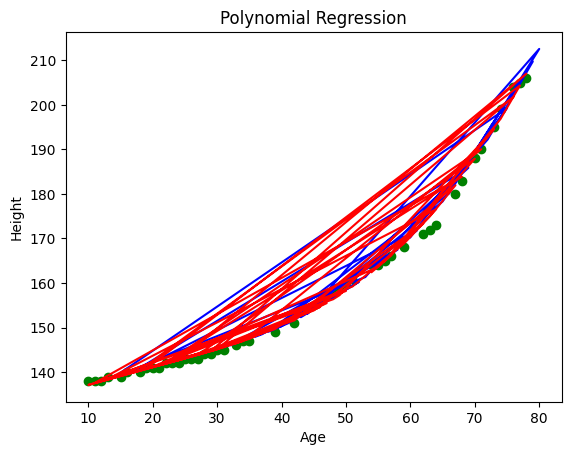

In [23]:
PolyReg = LinearRegression()
PolyReg.fit(x_polynom,y_train)


#visualize the Polynomial regression results

plt.scatter(x_train,y_train, color = "green")

plt.plot(x_test, PolyReg.predict(polynom.fit_transform(x_test)), color = "blue")
plt.plot(x_train, PolyReg.predict(polynom.fit_transform(x_train)), color = "red")
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Polynomial Regression")

In [24]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(x_test))

r_square_pr = metrics.r2_score(y_test,y_predict_pr)
r_square_pr

0.992763409209644

In [25]:
# model evaluation using R-Square for polynomial regression 
#polynom = PolynomialFeatures(degree = 3)  the r_square_pr is even higher compared to degree=2 (and linear n=1)